In [1]:
from numpy import *
import operator

In [2]:
def createDataSet():
    group = array([[1.0, 1.1], [1.1, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()

In [4]:
group

array([[ 1. ,  1.1],
       [ 1.1,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

In [ ]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
classify0([0,0], group,labels, 3)

In [ ]:
"""
代码释疑
1.tile函数
numpy.tile([0,0],5 ) output array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
numpy.tile([0,0],(2,1))#在列方向上重复[0,0]1次，行2次  output array([[0, 0],  
       [0, 0]])
numpy.tile([0,0],(1,3))#在列方向上重复[0,0]3次，行1次  output array([[0, 0, 0, 0, 0, 0]]) 
numpy.tile([0,0],(2,3)) output array([[0, 0, 0, 0, 0, 0],  
     output  [0, 0, 0, 0, 0, 0]]) 
2.np.sum() axis=1表示按行相加 , axis=0表示按列相加
3.argsort 排序
4.itemgetter 

"""

In [9]:
tile([0, 0], 5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
tile([0,0],(2,1))

array([[0, 0],
       [0, 0]])

In [11]:
tile([0,0],(1,3))

array([[0, 0, 0, 0, 0, 0]])

In [12]:
tile([0,0],(2,3))

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [13]:
dataSetSize = group.shape[0]

In [19]:
diffMat =tile([0.0,0.0],(dataSetSize,1)) - group

In [15]:
dataSetSize

4

In [20]:
diffMat

array([[-1. , -1.1],
       [-1.1, -1. ],
       [ 0. ,  0. ],
       [ 0. , -0.1]])

In [21]:
sqDiffMat = diffMat ** 2

In [22]:
sqDiffMat

array([[ 1.  ,  1.21],
       [ 1.21,  1.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.01]])

In [23]:
sqDistances = sqDiffMat.sum(axis=1)

In [24]:
sqDistances

array([ 2.21,  2.21,  0.  ,  0.01])

In [25]:
distances = sqDistances ** 0.5
sortedDistIndicies = distances.argsort()
classCount = {}

In [26]:
distances

array([ 1.48660687,  1.48660687,  0.        ,  0.1       ])

In [27]:
sortedDistIndicies

array([2, 3, 0, 1], dtype=int64)

In [28]:
for i in range(3):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)

In [29]:
sortedClassCount

[('B', 2), ('A', 1)]

In [31]:
def flie2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classlabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classlabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classlabelVector

ValueError: invalid literal for int() with base 10: 'largeDoses'

In [47]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [48]:
datingDataMat, datingLabels = flie2matrix('datingTestSet2.txt')

In [37]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [38]:
datingLabels[:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

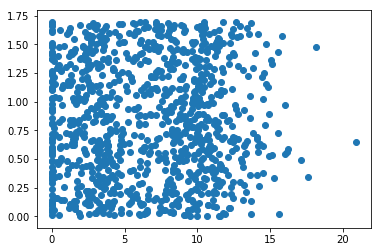

In [40]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

In [49]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],15.0 * array(datingLabels), 20.0 * array(datingLabels))
plt.show()

In [43]:
datingDataMat[:,1]

array([  8.32697600e+00,   7.15346900e+00,   1.44187100e+00,
         1.31473940e+01,   1.66978800e+00,   1.01417400e+01,
         6.83079200e+00,   1.32763690e+01,   8.63157700e+00,
         1.22731690e+01,   3.72349800e+00,   8.38587900e+00,
         4.87543500e+00,   4.68009800e+00,   1.52995700e+01,
         1.88946100e+00,   7.51675400e+00,   1.42391950e+01,
         0.00000000e+00,   1.05285550e+01,   3.54026500e+00,
         2.99155100e+00,   5.29786500e+00,   6.59380300e+00,
         2.81676000e+00,   1.24582580e+01,   0.00000000e+00,
         9.96864800e+00,   1.36483800e+00,   2.30453000e-01,
         1.18654020e+01,   1.20460000e-01,   8.54520400e+00,
         5.85664900e+00,   9.66561800e+00,   9.77876300e+00,
         4.93297600e+00,   2.21624600e+00,   1.43056360e+01,
         1.25918890e+01,   3.42464900e+00,   0.00000000e+00,
         8.53382300e+00,   9.82952800e+00,   1.14921860e+01,
         3.57096800e+00,   1.77122800e+00,   3.51392100e+00,
         4.39817200e+00,

In [42]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [50]:
datingDataMat[:,2]

array([  9.53952000e-01,   1.67390400e+00,   8.05124000e-01,
         4.28964000e-01,   1.34296000e-01,   1.03295500e+00,
         1.21319200e+00,   5.43880000e-01,   7.49278000e-01,
         1.50805300e+00,   8.31917000e-01,   1.66948500e+00,
         7.28658000e-01,   6.25224000e-01,   3.31351000e-01,
         1.91283000e-01,   1.26916400e+00,   2.61333000e-01,
         1.25018500e+00,   1.30484400e+00,   8.22483000e-01,
         8.33920000e-01,   6.38306000e-01,   1.87108000e-01,
         1.68620900e+00,   6.49617000e-01,   1.65641800e+00,
         7.31232000e-01,   6.40103000e-01,   1.15199600e+00,
         8.82810000e-01,   1.35201300e+00,   1.34042900e+00,
         1.60006000e-01,   7.78626000e-01,   1.08410300e+00,
         6.32026000e-01,   5.87095000e-01,   6.32317000e-01,
         6.86581000e-01,   1.00450400e+00,   1.47573000e-01,
         2.05324000e-01,   2.38620000e-01,   2.63499000e-01,
         8.32254000e-01,   2.07612000e-01,   9.91854000e-01,
         9.75024000e-01,

In [51]:
fig1 =plt.figure()
x = random.rand(100)
y = random.rand(100)

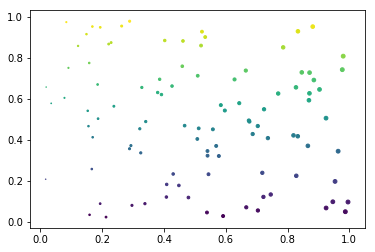

In [60]:
plt.scatter(x,y,15*x,y)
plt.show()

In [61]:
def autoNum(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normalDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normalDataSet = dataSet - tile(minVals,(m,1))
    normalDataSet = normalDataSet/tile(ranges,(m,1))
    return normalDataSet,ranges,minVals

In [62]:
normMat, ranges, minVals = autoNum(datingDataMat)

In [63]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [64]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [65]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [66]:
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNum(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [67]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [76]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    prectentTags = float(raw_input('precent time spending on video games'))
    ffmile = float(raw_input('frequrnt  '))
    icecream = float(raw_input('eat icecream'))
    datingDataMat, datingLabels, = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNum(datingDataMat)
    inArr = array([ffmile,prectentTags,icecream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print('you will probality like this person:', resultList[classifierResult-1])

In [77]:
classifyPerson()

NameError: name 'raw_input' is not defined